In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_excel("Superstore_USA.xlsx")

In [7]:
data.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [8]:
data.tail()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,East,West Virginia,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,West,Wyoming,Cheyenne,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530
9425,24492,Not Specified,0.09,7.78,2.50,3403,Tammy Buckley,Express Air,Consumer,Office Supplies,...,West,Wyoming,Cheyenne,82001,2013-09-12,2013-09-14,78.062400,23,172.48,87533


In [10]:
data.shape

(9426, 24)

In [11]:
data.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [12]:
data['Product Base Margin'].fillna(data["Product Base Margin"].mean(),inplace=True)

In [15]:
data.isnull().sum().sum()

0

In [16]:
data['Order Priority'].value_counts()

High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: Order Priority, dtype: int64

In [17]:
data['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [22]:
data['Order Priority']=data['Order Priority'].replace('Critical ','Critical')

In [23]:
data['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

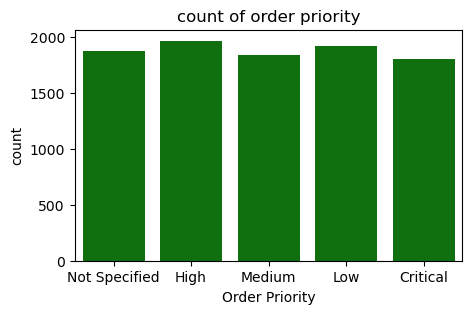

In [38]:
plt.figure(figsize=(5,3))
sns.countplot(x='Order Priority',data=data,color='g')
plt.title("count of order priority")
plt.savefig('count of order priority.jpg')

In [47]:
data['Ship Mode'].value_counts()

Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: Ship Mode, dtype: int64

In [42]:
data['Ship Mode'].unique()

array(['Regular Air', 'Express Air', 'Delivery Truck'], dtype=object)

In [48]:
x=data['Ship Mode'].value_counts().index
y=data['Ship Mode'].value_counts().values

In [49]:
data['Ship Mode'].value_counts().values

array([7036, 1283, 1107], dtype=int64)

In [50]:
x=data['Ship Mode'].value_counts().index
x

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object')

In [51]:
y

array([7036, 1283, 1107], dtype=int64)

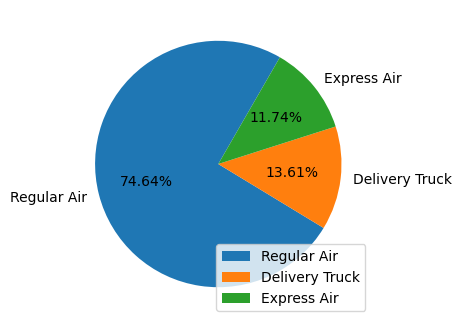

In [64]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60,autopct='%0.2f%%')
plt.legend(loc=4)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

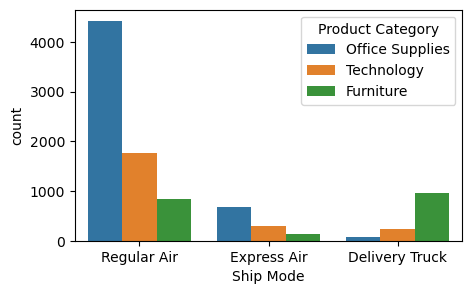

In [73]:
plt.figure(figsize=(5,3))
sns.countplot(x="Ship Mode",data=data,hue='Product Category')

<AxesSubplot:xlabel='Customer Segment', ylabel='count'>

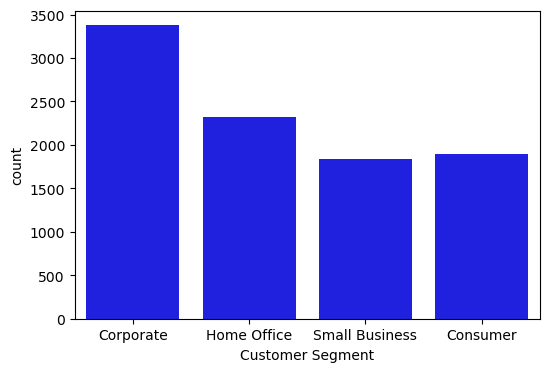

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment",data=data,color='b')

<AxesSubplot:xlabel='Product Category', ylabel='count'>

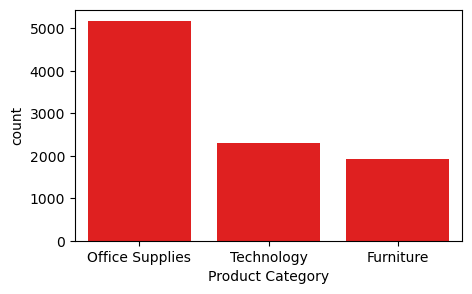

In [82]:
plt.figure(figsize=(5,3))
sns.countplot(x="Product Category",data=data,color='r')

<AxesSubplot:xlabel='Product Category', ylabel='count'>

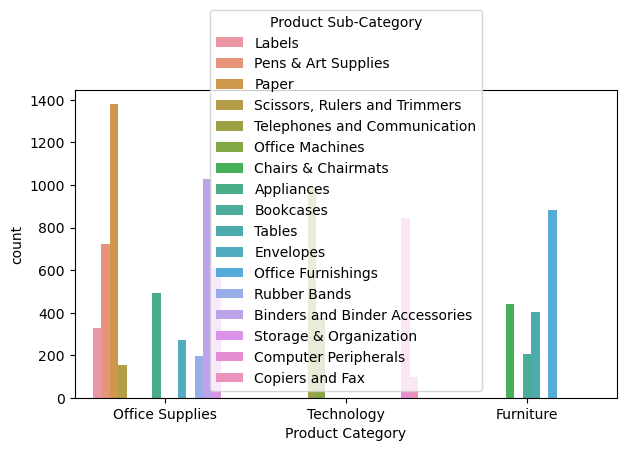

In [94]:
plt.figure(figsize=(7,4))
sns.countplot(x="Product Category",data=data,hue='Product Sub-Category')

<AxesSubplot:xlabel='Product Category', ylabel='count'>

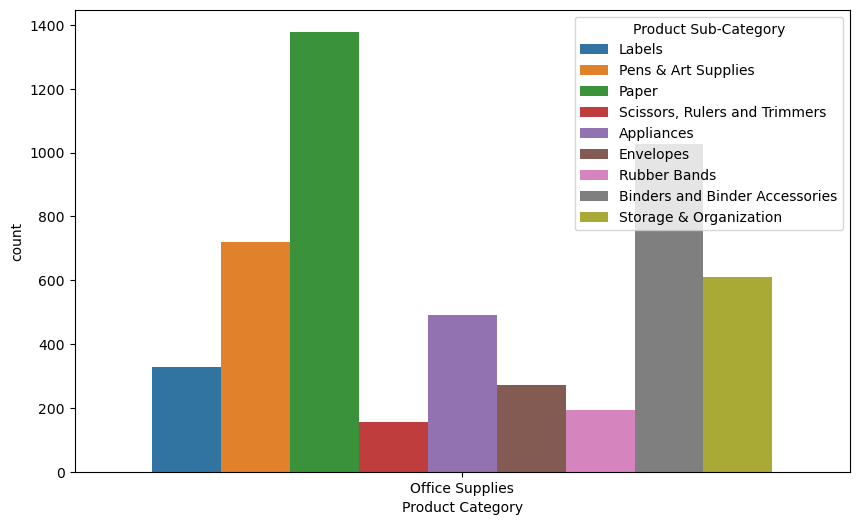

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=data[data['Product Category']=='Office Supplies'],hue='Product Sub-Category')

<AxesSubplot:xlabel='Product Category', ylabel='count'>

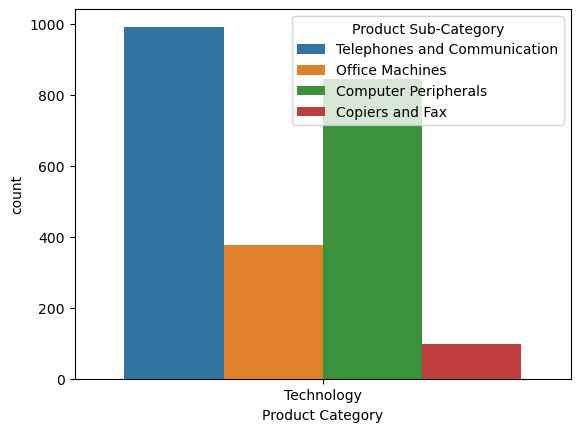

In [90]:
sns.countplot(x="Product Category",data=data[data['Product Category']=='Technology'],hue='Product Sub-Category')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [96]:
data['Order Date'].dt.year

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order Date, Length: 9426, dtype: int64

In [97]:
data['orderyear']=data['Order Date'].dt.year

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [102]:
data['orderyear'].value_counts()

2013    3054
2012    2241
2011    2179
2010    1952
Name: orderyear, dtype: int64

<AxesSubplot:xlabel='orderyear', ylabel='count'>

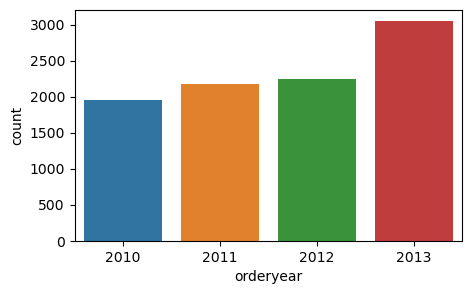

In [112]:
plt.figure(figsize=(5,3))
sns.countplot(data=data ,x="orderyear")

In [129]:
data['State or Province'].value_counts()[:5]

California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: State or Province, dtype: int64